# {ML vs My Mom - Housing Model}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

The problem being addressed is the difficulty in accurately predicting home prices in the real estate markets. Homebuyers, sellers, and real estate professionals can benefit from a reliable and accurate model that provides an estimation of home prices based on historical sales and relevant attributes.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

Can a machine learning model predict home prices more accurately than a human with good real estate knowledge (my mom) of the area (Loveland, OH)?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

The hypothesized answer is that the machine learning model, when trained on a comprehensive dataset of historical sales and relevant attributes, can provide more accurate predictions of home prices than a knowledgeable human, due to its ability to consider a larger number of variables and identify complex patterns in the data.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

I will be scrapping Zillow

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

1. Data Collection: Gather a comprehensive dataset of historical home sales in Loveland, OH, including property attributes (e.g., square footage, number of bedrooms, number of bathrooms, location, and other relevant factors).

2. Data Preprocessing & Exploratory Data Analysis: Clean and preprocess the data, handling missing values, outliers, and encoding categorical variables as needed. Examine and analyze the data to summarize the main characteristics and identify patterns, relationships, and anomalies.

3. Feature Engineering: Identify and create new features that may have predictive power, based on domain knowledge and exploratory data analysis.

4. Model Selection: Test various machine learning algorithms (e.g., linear regression, decision trees, support vector machines, and neural networks) and select the one that provides the best performance, based on evaluation metrics like Mean Absolute Error (MAE) and R-squared.

5. Model Training: Train the selected model on the preprocessed dataset, tuning hyperparameters as needed to optimize performance.

6. Model Evaluation: Evaluate the model's performance on a test dataset not used during training.

7. Interpretation and Validation: Analyze the results, interpret the model's predictions, and validate the model's accuracy by comparing it with the human's predictions on a new set of properties not used during training. If the model demonstrates superior performance, the hypothesis will be supported.

# Data Collection
**I'm scrapping Zillow to get all the houses sold in the Loveland, OH (45140 Zip Code) area in the past year (4/7/2022 - 4/7/2023)**

In [2]:
import json
import time
import pandas as pd
import http.client
import numpy as np
from scipy.stats import skew, kurtosis

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

**Making a request to Zillow to get the houses with the following fields that I've identified as meaningful**

In [2]:
statusType = []
soldPrice = []
unformattedPrice = []
address = []
addressStreet = []
addressCity = []
addressState = []
addressZipcode = []
beds = []
baths = []
area = []
isZillowOwned = []
variableData = []
hdpData = []
latitude = []
longitude = []
price = []
dateSold = []
homeType = []
homeStatus = []
zestimate = []
rentZestimate = []
priceForHDP = []
currency = []
country = []
taxAssessedValue = []
lotAreaValue = []
lotAreaUnit = []
brokerName = []

def getResponse(page):
  url = f"https://www.zillow.com/search/GetSearchPageState.htm?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A{page}%7D%2C%22usersSearchTerm%22%3A%22Loveland%2C%20OH%22%2C%22mapBounds%22%3A%7B%22west%22%3A-84.37974306982422%2C%22east%22%3A-84.10302493017578%2C%22south%22%3A39.152149232712055%2C%22north%22%3A39.36534736841241%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5710%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22doz%22%3A%7B%22value%22%3A%2212m%22%7D%2C%22isCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleForeclosure%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartment%22%3A%7B%22value%22%3Afalse%7D%2C%22isMultiFamily%22%3A%7B%22value%22%3Afalse%7D%2C%22isAllHomes%22%3A%7B%22value%22%3Atrue%7D%2C%22sortSelection%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22isAuction%22%3A%7B%22value%22%3Afalse%7D%2C%22isNewConstruction%22%3A%7B%22value%22%3Afalse%7D%2C%22isRecentlySold%22%3A%7B%22value%22%3Atrue%7D%2C%22isLotLand%22%3A%7B%22value%22%3Afalse%7D%2C%22isTownhouse%22%3A%7B%22value%22%3Afalse%7D%2C%22isMiddleSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isHighSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22includeUnratedSchools%22%3A%7B%22value%22%3Afalse%7D%2C%22isManufactured%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByOwner%22%3A%7B%22value%22%3Afalse%7D%2C%22isComingSoon%22%3A%7B%22value%22%3Afalse%7D%2C%22isPublicSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isPrivateSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartmentOrCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isElementarySchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByAgent%22%3A%7B%22value%22%3Afalse%7D%2C%22isCharterSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22greatSchoolsRating%22%3A%7B%22min%22%3A%221%22%7D%7D%2C%22isListVisible%22%3Atrue%7D&wants={{%22cat1%22:[%22listResults%22]}}&requestId=2"

  conn = http.client.HTTPSConnection("www.zillow.com")

  payload={}
  headers = {
    'Cookie': 'x-amz-continuous-deployment-state=AYABeHEN0tqCsWupmgl3%2F5ovG78APgACAAFEAB1kM2Jsa2Q0azB3azlvai5jbG91ZGZyb250Lm5ldAABRwAVRzAxMTE2MjczQzlQQzdZU1JDTVBHAAEAAkNEABpDb29raWUAAACAAAAADG%2F52OaQfNIJt5gr7wAwa8ksg4xl78oKkXFQzgMai7yix49fWvQdzMBOStxRZ0nNBNdkcp0yAUNlFIZtgepnAgAAAAAMAAQAAAAAAAAAAAAAAAAAALGapE1G2GC1faDJGo+NNaX%2F%2F%2F%2F%2FAAAAAQAAAAAAAAAAAAAAAQAAAAxE9IK0h9G6jGBvr5xywc2FYfQD9+myuKPFg1MgQD9+myuKPFg1Mg==; search=6|1682459771554%7Crect%3D39.36534736841241%252C-84.10302493017578%252C39.152149232712055%252C-84.37974306982422%26rid%3D5710%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26listPriceActive%3D1%26days%3D12m%26type%3Dhouse%26fs%3D0%26fr%3D0%26mmm%3D0%26rs%3D1%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%26featuredMultiFamilyBuilding%3D0%26commuteMode%3Ddriving%26commuteTimeOfDay%3Dnow%09%09%09%09%09%09%09%09; zgsession=1|e42fe483-86c7-4941-a44a-035f9ad782e7; zguid=24|%2423d0665d-1a19-4c83-95e5-30ab8f8ec133; AWSALB=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; AWSALBCORS=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; JSESSIONID=B27F9E1F606458A6EEBC079ECEA1DFB6'
  }

  conn.request("GET", url, payload, headers)
  res = conn.getresponse()
  data = res.read()
  data = data.decode("utf-8")
  json_obj = json.loads(data)
  return json_obj

def getData(json_obj):
  data = [x for x in json_obj["cat1"]["searchResults"]['listResults']]
      
  for d in data:
    statusType.append(d['statusType'] if 'statusType' in d else None)
    soldPrice.append(d['soldPrice'] if 'soldPrice' in d else None)
    unformattedPrice.append(d['unformattedPrice'] if 'unformattedPrice' in d else None)
    address.append(d['address'] if 'address' in d else None)
    addressStreet.append(d['addressStreet'] if 'addressStreet' in d else None)
    addressCity.append(d['addressCity'] if 'addressCity' in d else None)
    addressState.append(d['addressState'] if 'addressState' in d else None)
    addressZipcode.append(d['addressZipcode'] if 'addressZipcode' in d else None)
    beds.append(d['beds'] if 'beds' in d else None)
    baths.append(d['baths'] if 'baths' in d else None)
    area.append(d['area'] if 'area' in d else None)
    isZillowOwned.append(d['isZillowOwned'] if 'isZillowOwned' in d else None)
    variableData.append(d['variableData'] if 'variableData' in d else None)
    hdpData.append(d['hdpData'] if 'hdpData' in d else None)
    latitude.append(d['hdpData']['homeInfo']['latitude'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'latitude' in d['hdpData']['homeInfo'] else None)
    longitude.append(d['hdpData']['homeInfo']['longitude'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'longitude' in d['hdpData']['homeInfo'] else None)
    price.append(d['hdpData']['homeInfo']['price'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'price' in d['hdpData']['homeInfo'] else None)
    dateSold.append(d['hdpData']['homeInfo']['dateSold'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'dateSold' in d['hdpData']['homeInfo'] else None)
    homeType.append(d['hdpData']['homeInfo']['homeType'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'homeType' in d['hdpData']['homeInfo'] else None)
    homeStatus.append(d['hdpData']['homeInfo']['homeStatus'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'homeStatus' in d['hdpData']['homeInfo'] else None)
    zestimate.append(d['hdpData']['homeInfo']['zestimate'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'zestimate' in d['hdpData']['homeInfo'] else None)
    rentZestimate.append(d['hdpData']['homeInfo']['rentZestimate'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'rentZestimate' in d['hdpData']['homeInfo'] else None)  
    priceForHDP.append(d['hdpData']['homeInfo']['priceForHDP'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'priceForHDP' in d['hdpData']['homeInfo'] else None)
    currency.append(d['hdpData']['homeInfo']['currency'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'currency' in d['hdpData']['homeInfo'] else None)
    country.append(d['hdpData']['homeInfo']['country'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'country' in d['hdpData']['homeInfo'] else None)
    taxAssessedValue.append(d['hdpData']['homeInfo']['taxAssessedValue'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'taxAssessedValue' in d['hdpData']['homeInfo'] else None)
    lotAreaValue.append(d['hdpData']['homeInfo']['lotAreaValue'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'lotAreaValue' in d['hdpData']['homeInfo'] else None)
    lotAreaUnit.append(d['hdpData']['homeInfo']['lotAreaUnit'] if 'hdpData' in d and 'homeInfo' in d['hdpData'] and 'lotAreaUnit' in d['hdpData']['homeInfo'] else None)
    brokerName.append(d['brokerName'] if 'brokerName' in d else None)

**Run initially to get the total pages of data in the response**

In [3]:
url = f"https://www.zillow.com/search/GetSearchPageState.htm?searchQueryState=%7B%22pagination%22%3A%7B%22currentPage%22%3A1%7D%2C%22usersSearchTerm%22%3A%22Loveland%2C%20OH%22%2C%22mapBounds%22%3A%7B%22west%22%3A-84.37974306982422%2C%22east%22%3A-84.10302493017578%2C%22south%22%3A39.152149232712055%2C%22north%22%3A39.36534736841241%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5710%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22doz%22%3A%7B%22value%22%3A%2212m%22%7D%2C%22isCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleForeclosure%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartment%22%3A%7B%22value%22%3Afalse%7D%2C%22isMultiFamily%22%3A%7B%22value%22%3Afalse%7D%2C%22isAllHomes%22%3A%7B%22value%22%3Atrue%7D%2C%22sortSelection%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22isAuction%22%3A%7B%22value%22%3Afalse%7D%2C%22isNewConstruction%22%3A%7B%22value%22%3Afalse%7D%2C%22isRecentlySold%22%3A%7B%22value%22%3Atrue%7D%2C%22isLotLand%22%3A%7B%22value%22%3Afalse%7D%2C%22isTownhouse%22%3A%7B%22value%22%3Afalse%7D%2C%22isMiddleSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isHighSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22includeUnratedSchools%22%3A%7B%22value%22%3Afalse%7D%2C%22isManufactured%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByOwner%22%3A%7B%22value%22%3Afalse%7D%2C%22isComingSoon%22%3A%7B%22value%22%3Afalse%7D%2C%22isPublicSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isPrivateSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isApartmentOrCondo%22%3A%7B%22value%22%3Afalse%7D%2C%22isElementarySchool%22%3A%7B%22value%22%3Afalse%7D%2C%22isForSaleByAgent%22%3A%7B%22value%22%3Afalse%7D%2C%22isCharterSchool%22%3A%7B%22value%22%3Afalse%7D%2C%22greatSchoolsRating%22%3A%7B%22min%22%3A%221%22%7D%7D%2C%22isListVisible%22%3Atrue%7D&wants={{%22cat1%22:[%22listResults%22]}}&requestId=2"

conn = http.client.HTTPSConnection("www.zillow.com")

payload={}
headers = {
'Cookie': 'x-amz-continuous-deployment-state=AYABeHEN0tqCsWupmgl3%2F5ovG78APgACAAFEAB1kM2Jsa2Q0azB3azlvai5jbG91ZGZyb250Lm5ldAABRwAVRzAxMTE2MjczQzlQQzdZU1JDTVBHAAEAAkNEABpDb29raWUAAACAAAAADG%2F52OaQfNIJt5gr7wAwa8ksg4xl78oKkXFQzgMai7yix49fWvQdzMBOStxRZ0nNBNdkcp0yAUNlFIZtgepnAgAAAAAMAAQAAAAAAAAAAAAAAAAAALGapE1G2GC1faDJGo+NNaX%2F%2F%2F%2F%2FAAAAAQAAAAAAAAAAAAAAAQAAAAxE9IK0h9G6jGBvr5xywc2FYfQD9+myuKPFg1MgQD9+myuKPFg1Mg==; search=6|1682459771554%7Crect%3D39.36534736841241%252C-84.10302493017578%252C39.152149232712055%252C-84.37974306982422%26rid%3D5710%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26listPriceActive%3D1%26days%3D12m%26type%3Dhouse%26fs%3D0%26fr%3D0%26mmm%3D0%26rs%3D1%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%26featuredMultiFamilyBuilding%3D0%26commuteMode%3Ddriving%26commuteTimeOfDay%3Dnow%09%09%09%09%09%09%09%09; zgsession=1|e42fe483-86c7-4941-a44a-035f9ad782e7; zguid=24|%2423d0665d-1a19-4c83-95e5-30ab8f8ec133; AWSALB=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; AWSALBCORS=7o8QDvkzOEBfwgmsA8eFXbIz1xIWMhxgOu0raIK0MDqHFCnifRfm9ictKJBlnRbacFusneyZJ4AduduIXRQEGjgvn1b/8WcE9Sa3zUAmkNpWqTSZPidQJZyNEvnz; JSESSIONID=B27F9E1F606458A6EEBC079ECEA1DFB6'
}

conn.request("GET", url, payload, headers)
res = conn.getresponse()
data = res.read()
data = data.decode("utf-8")
json_obj = json.loads(data)

total_pages = json_obj.get('cat1', dict()).get('searchList', dict()).get('totalPages')

print(total_pages)

20


**Zillow does not like scraping, so we need to sleep for a while between requests**

In [4]:
for page in range(1, total_pages+1):
    json_obj = getResponse(page)
    getData(json_obj)
    time.sleep(100)

**Let's put our scraped data into a csv for future use**

In [5]:
holder = (list(zip(statusType,soldPrice,unformattedPrice,address,addressStreet,addressCity,addressState,addressZipcode,beds,baths,area,isZillowOwned,variableData,hdpData,latitude,longitude,price,dateSold,homeType,homeStatus,zestimate,rentZestimate,priceForHDP,currency,country,taxAssessedValue,lotAreaValue,lotAreaUnit,brokerName)))
columns = ['statusType', 'soldPrice', 'unformattedPrice', 'address', 'addressStreet', 'addressCity', 'addressState', 'addressZipcode', 'beds', 'baths', 'area', 'isZillowOwned', 'variableData', 'hdpData', 'latitude', 'longitude', 'price', 'dateSold', 'homeType', 'homeStatus', 'zestimate', 'rentZestimate', 'priceForHDP', 'currency', 'country', 'taxAssessedValue', 'lotAreaValue', 'lotAreaUnit', 'brokerName']
houses = pd.DataFrame(holder, columns=columns)
houses.to_csv('houses.csv', index=False)

# Data Preprocessing & Exploratory Data Analysis

In [63]:
houses = pd.read_csv('houses.csv')
houses = houses[houses['addressZipcode'] == 45140]
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 799
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statusType        746 non-null    object 
 1   soldPrice         746 non-null    object 
 2   unformattedPrice  746 non-null    int64  
 3   address           746 non-null    object 
 4   addressStreet     746 non-null    object 
 5   addressCity       746 non-null    object 
 6   addressState      746 non-null    object 
 7   addressZipcode    746 non-null    int64  
 8   beds              679 non-null    float64
 9   baths             679 non-null    float64
 10  area              655 non-null    float64
 11  isZillowOwned     746 non-null    bool   
 12  variableData      746 non-null    object 
 13  hdpData           746 non-null    object 
 14  latitude          734 non-null    float64
 15  longitude         734 non-null    float64
 16  price             746 non-null    float64
 17  da

**Dropping some unuseful columns**

In [64]:
houses.drop(['statusType', 'soldPrice', 'address', 'addressStreet', 'addressCity', 'addressState', 'addressZipcode', 'isZillowOwned', 'variableData', 'hdpData', 'price', 'homeType', 'homeStatus', 'priceForHDP', 'currency', 'country', 'brokerName'], axis=1, inplace=True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746 entries, 0 to 799
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unformattedPrice  746 non-null    int64  
 1   beds              679 non-null    float64
 2   baths             679 non-null    float64
 3   area              655 non-null    float64
 4   latitude          734 non-null    float64
 5   longitude         734 non-null    float64
 6   dateSold          746 non-null    int64  
 7   zestimate         620 non-null    float64
 8   rentZestimate     713 non-null    float64
 9   taxAssessedValue  717 non-null    float64
 10  lotAreaValue      737 non-null    float64
 11  lotAreaUnit       737 non-null    object 
dtypes: float64(9), int64(2), object(1)
memory usage: 75.8+ KB


**Changing column names to make more sense**

In [65]:
houses.rename(columns={'unformattedPrice': 'price', 'area': 'sqft'}, inplace=True)
houses.head()

,price,beds,baths,sqft,latitude,longitude,dateSold,zestimate,rentZestimate,taxAssessedValue,lotAreaValue,lotAreaUnit
0,300000,3.0000,2.0000,1269.0000,39.2993,-84.2749,1680850800000,275300.0000,1700.0000,183140.0000,8550.8280,sqft
1,218000,3.0000,1.0000,925.0000,39.2690,-84.2750,1680764400000,211000.0000,1749.0000,93270.0000,8059.0000,acres
2,535000,4.0000,4.0000,2914.0000,39.2212,-84.2327,1680678000000,546400.0000,3033.0000,293300.0000,0.6900,acres
3,850000,4.0000,5.0000,5101.0000,39.2359,-84.2500,1680505200000,NaN,3999.0000,NaN,0.5620,acres
4,660300,3.0000,2.0000,1880.0000,39.2891,-84.2443,1680159600000,660700.0000,2194.0000,336410.0000,4.2378,acres


**Some of the area values are in sqft and some are in acres, let's convert all of them to acres**

In [66]:
def convert_to_acres(row):
    if row['lotAreaUnit'] == 'sqft':
        return row['lotAreaValue'] / 43560
    else:
        return row['lotAreaValue']

houses['lotAreaValue'] = houses.apply(convert_to_acres, axis=1)

houses.drop(['lotAreaUnit'], axis=1, inplace=True)

**The price is what we're focused on, so let's take a further look at it**

In [67]:
print(houses['price'].describe())
print('Median: ', houses['price'].median())

count        746.0000
mean      421241.0040
std       519379.4611
min         1000.0000
25%       224250.0000
50%       340000.0000
75%       515750.0000
max     10326000.0000
Name: price, dtype: float64
Median:  340000.0


**Wow, a house sold for $10.3 million and one sold for only $1,000! Something isn't right, I did some digging and it looks like Zillow had some wrong data for some "houses". I checked the $10.3 million dollar "house" and it turns out it isn't a house. To negate these issues, I've decided to filter my dataset to prices under $10,000,000.**

I filtered by the zip code 45140 above so this house ins't in our data frame but it is in the raw data, go ahead and check out the price ;) - https://www.zillow.com/homedetails/6091-2nd-St-Miamiville-OH-45147/2062599063_zpid/

In [68]:
houses = houses[(houses['price'] < 5000000)]
print(houses['price'].describe())
print('Median: ', houses['price'].median())

count       743.0000
mean     394777.6433
std      271608.7988
min        1000.0000
25%      224000.0000
50%      338000.0000
75%      515000.0000
max     3100000.0000
Name: price, dtype: float64
Median:  338000.0


**For the houses on the lower end of the price spectrum (like our $1,000 house), I found that either the data was wrong or the houses were complete trash (fixer-uppers if you will). So the cells below were used to help me determine an appropriate cutoff**

1st percentile:  15000.0
5th percentile:  85000.0
10th percentile:  149900.0


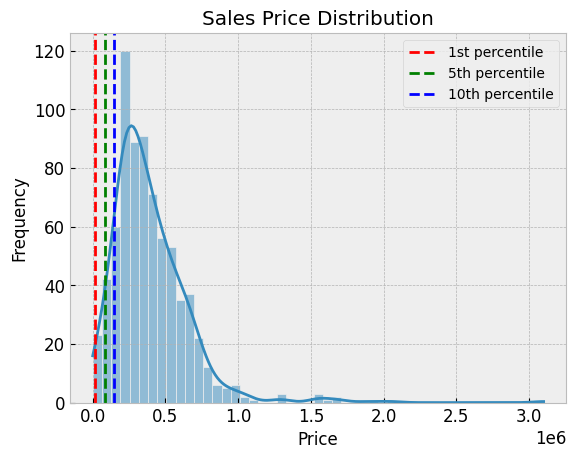

In [69]:
p1 = np.percentile(houses['price'], 1)
p5 = np.percentile(houses['price'], 5)
p10 = np.percentile(houses['price'], 10)

print('1st percentile: ', p1)
print('5th percentile: ', p5)
print('10th percentile: ', p10)

sns.histplot(data=houses, x='price', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Sales Price Distribution')
plt.axvline(x=p1, color='red', linestyle='--', label='1st percentile')
plt.axvline(x=p5, color='green', linestyle='--', label='5th percentile')
plt.axvline(x=p10, color='blue', linestyle='--', label='10th percentile')
plt.legend()
plt.show()

**1st percentile: $15,000 - Choosing this value would retain 99% of the data, but the value still seems quite low for a home price.**
**5th percentile: $85,000 - This option retains 95% of the data and seems a little more reasonable as a minimum value for a house.**
**10th percentile: $149,900 - This choice retains 90% of the data and might be more representative of the lower end of the housing market.**

**Due to our fixer-upper dillema, I'm gonna go with $149,900 as our minimum value for price.**

In [70]:
houses = houses[(houses['price'] >= 149900)]

**Let's check out a histogram of the price again**

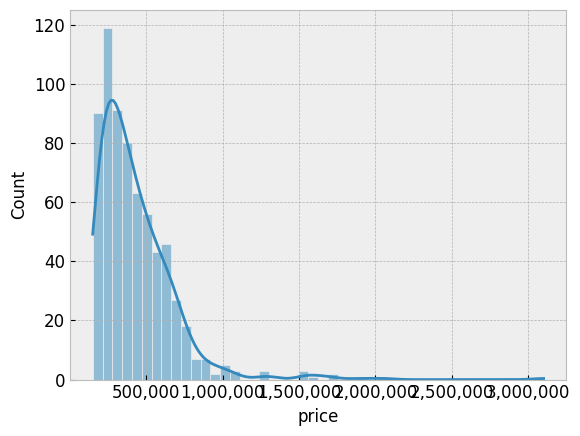

In [71]:
ax = sns.histplot(houses['price'], kde=True)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:,.0f}'.format))
plt.show()

**This looks better but it is still skewed to the right, let's look at this further**

In [72]:
print('Skewness: ', houses['price'].skew())
print('Kurtosis: ', houses['price'].kurt())

Skewness:  3.345242568755424
Kurtosis:  21.559143295158552


**We can normalize the price using a log transformation. This makes the data more symettryic and follow a normal-like distribution, helping reduce the impact of outliers, handle skewed data, and stabilize the variance across diffferent levels of the variable.**

Log Skewness:  0.4593365980223383
Log Kurtosis:  0.2061849900644699


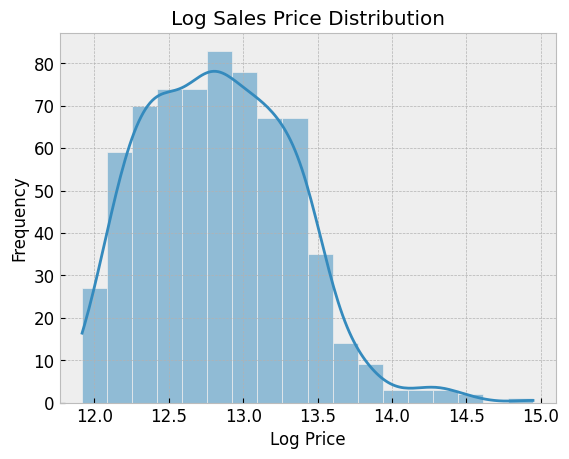

In [73]:
houses['log_price'] = np.log(houses['price'])

log_skewness = skew(houses['log_price'])
log_kurtosis = kurtosis(houses['log_price'])

print("Log Skewness: ", log_skewness)
print("Log Kurtosis: ", log_kurtosis)

sns.histplot(data=houses, x='log_price', kde=True)
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Log Sales Price Distribution')
plt.show()

**Let's start digging into some other stuff, let's make sure there are no duplicates.**

In [74]:
houses.duplicated().sum()

0

**Let's look at the correlation between the price and our features.**

In [75]:
houses.corr()['log_price'].sort_values(ascending=False)

log_price           1.0000
price               0.9127
zestimate           0.8542
sqft                0.7542
rentZestimate       0.7409
baths               0.7082
taxAssessedValue    0.6785
beds                0.5289
latitude            0.0604
lotAreaValue        0.0335
dateSold            0.0035
longitude          -0.1277
Name: log_price, dtype: float64

<Axes: >

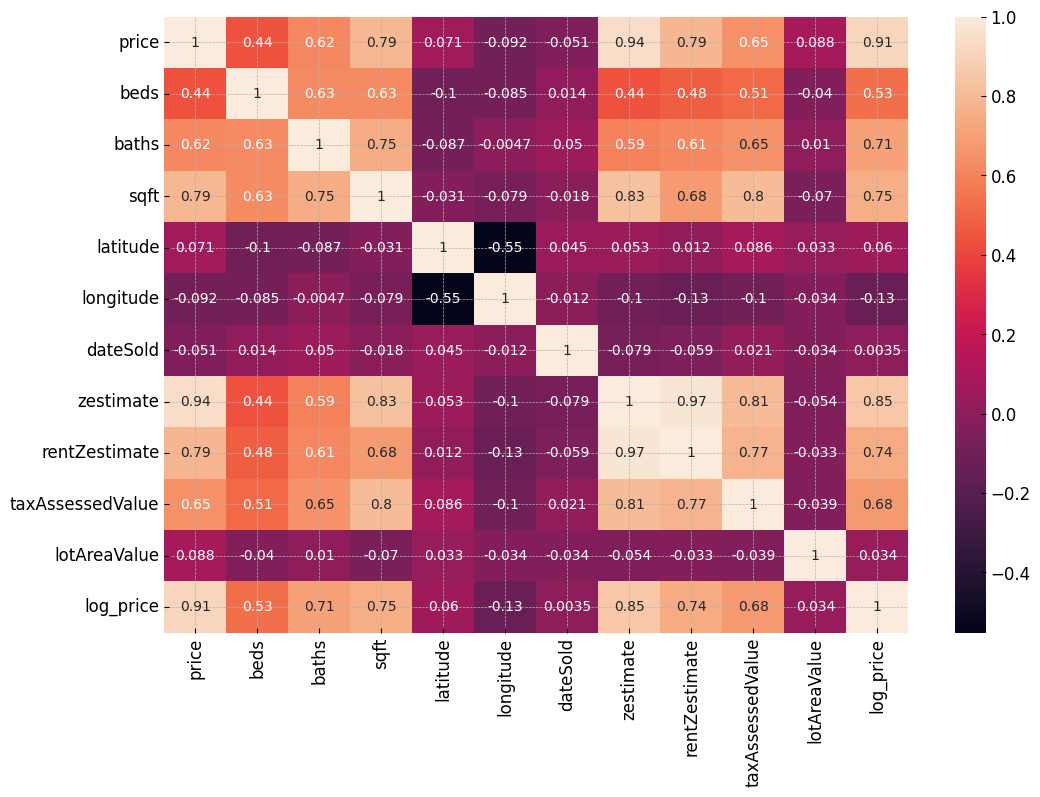

In [76]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(houses.corr(), annot=True, ax=ax)

**The Zillow estimates are highly correlated, however these are estimates/predictions themselves. I'd like to create a model that doesn't use another estimate/prediction system. Using them may improve the accuracy of my model, however these are current estimates and not estimates from when the house was sold. I may revisit this, still thinking through it. I'm going to drop the taxAssessedValue as well.**

In [77]:
houses.drop(['zestimate', 'rentZestimate', 'taxAssessedValue'], axis=1, inplace=True)

**The dateSold and the latitude/longitude weren't very correlated to the price. I'd like to use latitude and longititude in some way, may revisit later.**

In [78]:
houses.drop(['dateSold', 'latitude', 'longitude'], axis=1, inplace=True)

**I'm going to drop price to since we are using the log_price.**

In [79]:
houses.drop(['price'], axis=1, inplace=True)

**Lot's of good features here, however some of them have missing values. Let's figure out what to do with these.**

In [80]:
houses.isna().sum()

beds            40
baths           40
sqft            64
lotAreaValue     7
log_price        0
dtype: int64

**Option 1: Remove rows with missing values**

In [81]:
houses_clean = houses.dropna()

In [82]:
houses_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, 0 to 798
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   beds          599 non-null    float64
 1   baths         599 non-null    float64
 2   sqft          599 non-null    float64
 3   lotAreaValue  599 non-null    float64
 4   log_price     599 non-null    float64
dtypes: float64(5)
memory usage: 28.1 KB


**Option 2: Fill in missing values**

In [83]:
houses_filled = houses.copy()
houses_filled['beds'].fillna(houses_filled['beds'].median(), inplace=True)
houses_filled['baths'].fillna(houses_filled['baths'].median(), inplace=True)
houses_filled['sqft'].fillna(houses_filled['sqft'].median(), inplace=True)
houses_filled['lotAreaValue'].fillna(houses_filled['lotAreaValue'].median(), inplace=True)

In [84]:
houses_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 0 to 799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   beds          669 non-null    float64
 1   baths         669 non-null    float64
 2   sqft          669 non-null    float64
 3   lotAreaValue  669 non-null    float64
 4   log_price     669 non-null    float64
dtypes: float64(5)
memory usage: 31.4 KB


**I'm gonna go with the houses_clean for now, let's see how we are looking.**

In [87]:
houses_clean.corr()['log_price'].sort_values(ascending=False)

log_price       1.0000
sqft            0.8224
baths           0.7094
beds            0.5429
lotAreaValue   -0.0653
Name: log_price, dtype: float64

# Feature Engineering

**I thought lotAreaValue would be more meaningful, let's **

# Model Selection

# Model Training

# Model Evaluation

# Interpretation and Validation

In [59]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 23159 bytes to source.py
